**EXCERSICE 1** 🇨

<div class="alert-success">

1. Plot three maps of one country.

2. Plot your three layers.
    
</div>

In [71]:
linkWorldMap="https://github.com/CienciaDeDatosEspacial/intro_geodataframe/raw/main/maps/worldMaps.gpkg"


import geopandas as gpd
from  fiona import listlayers
listlayers(linkWorldMap)

['countries', 'rivers', 'cities', 'indicators']

In [72]:
countries=gpd.read_file(linkWorldMap,layer='countries')
rivers=gpd.read_file(linkWorldMap,layer='rivers')
cities=gpd.read_file(linkWorldMap,layer='cities')
indicators=gpd.read_file(linkWorldMap,layer='indicators')

<Axes: >

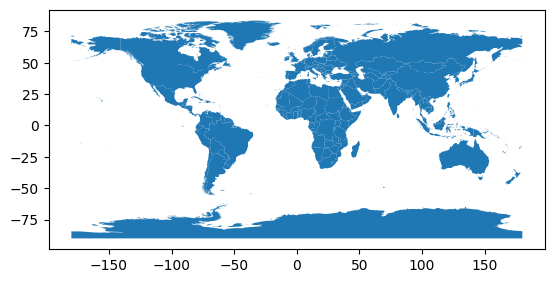

In [73]:
#Primer mapa de todos los paises
countries.plot()

<Axes: >

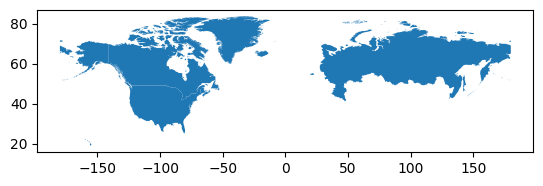

In [74]:
# Segundo Mapa (Norte)
countries.cx[:0,65:].plot()

In [75]:
#filtro para quedarme solo con el pais seleccionado
canada=countries[countries.COUNTRY=='Canada']

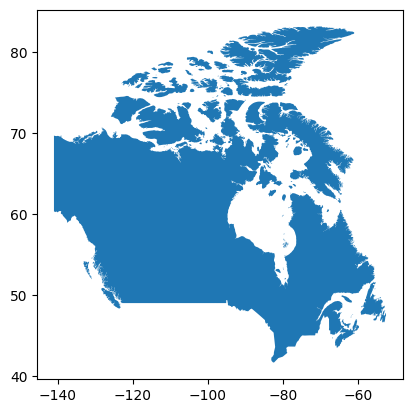

In [76]:
#Tercer mapa
base=canada.plot()

In [77]:
#para filtrar ciudades y rios de canada
citiesCanada_clipped = gpd.clip(gdf=cities,
                          mask=canada)
riversCanada_clipped = gpd.clip(gdf=rivers,
                               mask=canada)

<Axes: >

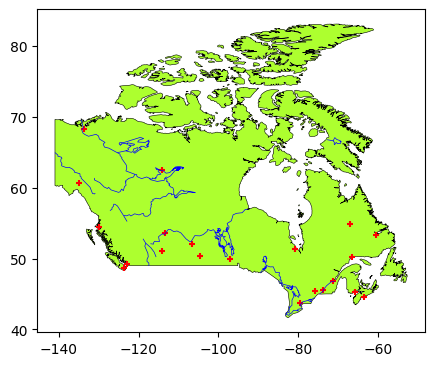

In [78]:
#limites del "poligono" de canada
base = canada.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
citiesCanada_clipped.plot(marker='+', color='red', markersize=15,
                    ax=base)
riversCanada_clipped.plot(edgecolor='blue', linewidth=0.5,
                    ax=base)

**EXCERCISE 2**
🍁
1. Reproject your country's map layers.
2. Plot the reprojected layers
3. Save the reprojected layers

In [79]:
canada.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [80]:
canada.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [81]:
# is this CRS projected?
canada.crs.is_projected

False

In [ ]:
canada.centroid

<ipython-input-12-699e85e4797b>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  canada.centroid


35    POINT (-98.26545 61.39204)
dtype: geometry

In [ ]:
canada.to_crs(3347).crs.axis_info

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [ ]:
canada.to_crs(3347).centroid

35    POINT (5972149.890 2686372.792)
dtype: geometry

<Axes: >

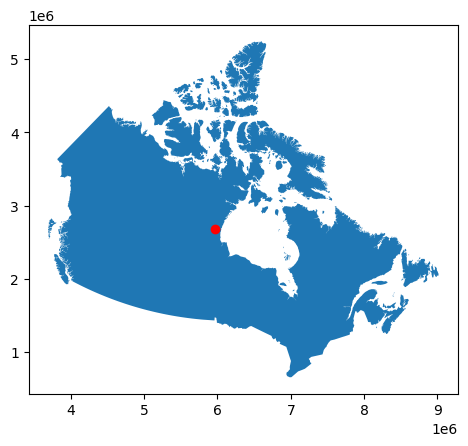

In [ ]:
base3347=canada.to_crs(3347).plot()
canada.to_crs(3347).centroid.plot(color='red',ax=base3347)

In [82]:
#cambiar proyeccion de las ciudades y los rios
canada_3347=canada.to_crs(3347)
cities_canada_3347=citiesCanada_clipped.to_crs(canada_3347.crs)
rivers_canada_3347=riversCanada_clipped.to_crs(canada_3347.crs)

In [83]:
#grabar las capas nuevas con la nueva proyeccion (3347)
import os

canada_3347.to_file(os.path.join("maps","canadaMaps_3347.gpkg"), layer='country', driver="GPKG")
cities_canada_3347.to_file(os.path.join("maps","canadaMaps_3347.gpkg"), layer='cities', driver="GPKG")
rivers_canada_3347.to_file(os.path.join("maps","canadaMaps_3347.gpkg"), layer='rivers', driver="GPKG")
canada_3347.centroid.to_file(os.path.join("maps","canadaMaps_3347.gpkg"), layer='centroid', driver="GPKG")

*texto en cursiva*### Exercise 3 ✈
<div class="alert-success">

1. Find the airports for your country [here](https://ourairports.com/data/). The data is in a CSV file.
2. Create projected layer of airports.
3. Plot all the layers and airports on top.

In [86]:
import pandas as pd
#invocamos nuestra infromación de los aeropuertos de canada (que está previamente guardada en nuestro repositorio de github)
infoairports=pd.read_csv("https://github.com/Journey-of-Success/tarea4_2/raw/main/data/ca-airports.csv")

#para visualizar las primeras y ultimas filas
infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:]

id    ident           type  \
0       1990     CYYZ  large_airport   
1       1941     CYVR  large_airport   
2       1928     CYUL  large_airport   
3       1973     CYYC  large_airport   
3110  320714  CA-0659         closed   
3111   39705  CA-0059         closed   
3112   40067  CA-0421         closed   
3113   40068  CA-0422         closed   

                                                   name  latitude_deg  \
0       Toronto Lester B. Pearson International Airport     43.677200   
1                       Vancouver International Airport     49.193901   
2     Montreal / Pierre Elliott Trudeau Internationa...     45.467837   
3                         Calgary International Airport     51.118822   
3110                                     Yahk Aerodrome     49.109000   
3111                                    Brazeau Airport     52.967817   
3112                                    E C Air Airport     51.536140   
3113                                       Yoyo Airport     58.925800   

      longitude_deg  elevation_ft  continent country_name iso_country  ...  \
0        -79.630600         569.0        NaN       Canada          CA  ...   
1       -123.183998          14.0        NaN       Canada          CA  ...   
2        -73.742294         118.0        NaN       Canada          CA  ...   
3       -114.009933        3557.0        NaN       Canada          CA  ...   
3110    -116.059800        2870.0        NaN       Canada          CA  ...   
3111    -115.867370           NaN        NaN       Canada          CA  ...   
3112    -111.193240           NaN        NaN       Canada          CA  ...   
3113    -121.473201        1950.0        NaN       Canada          CA  ...   

     municipality scheduled_service gps_code iata_code  local_code  \
0         Toronto                 1     CYYZ       YYZ         YYZ   
1       Vancouver                 1     CYVR       YVR         NaN   
2        Montréal                 1     CYUL       YUL         YUL   
3         Calgary                 1     CYYC       YYC         NaN   
3110         Yahk                 0      NaN       NaN         NaN   
3111   Yellowhead                 0      NaN       NaN         NaN   
3112   Youngstown                 0      NaN       NaN         NaN   
3113         Yoyo                 0      NaN       NaN         NaN   

                                    home_link  \
0                        http://www.gtaa.com/   
1                          http://www.yvr.ca/   
2     http://www.admtl.com/passager/Home.aspx   
3              http://www.calgaryairport.com/   
3110                                      NaN   
3111                                      NaN   
3112                                      NaN   
3113                                      NaN   

                                         wikipedia_link  \
0     https://en.wikipedia.org/wiki/Toronto_Pearson_...   
1     https://en.wikipedia.org/wiki/Vancouver_Intern...   
2     https://en.wikipedia.org/wiki/Montr%C3%A9al-Pi...   
3     https://en.wikipedia.org/wiki/Calgary_Internat...   
3110                                                NaN   
3111                                                NaN   
3112                                                NaN   
3113                                                NaN   

                                        keywords    score  \
0     YTO, Toronto International Airport, Malton  1040275   
1                                            NaN  1018875   
2                            YMQ, Dorval Airport    51875   
3                                   McCall Field    51275   
3110                                         NaN        0   
3111                                         NaN        0   
3112                                         NaN        0   
3113                                    BL8, BL8        0   

                   last_updated  
0     2024-04-02T16:48:43+00:00  
1     2013-07-22T11:09:16+00:00  
2     2024-04-02T16:47:08+00:00

In [ ]:
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

id ident            type  \
0  1941  CYVR   large_airport   
1  1928  CYUL   large_airport   
2  1973  CYYC   large_airport   
3  1840  CYOW   large_airport   
4  1926  CYTZ  medium_airport   

                                                name  latitude_deg  \
0                    Vancouver International Airport     49.193901   
1  Montreal / Pierre Elliott Trudeau Internationa...     45.467837   
2                      Calgary International Airport     51.118822   
3     Ottawa Macdonald-Cartier International Airport     45.322498   
4           Billy Bishop Toronto City Centre Airport     43.627499   

   longitude_deg  elevation_ft  continent country_name iso_country  ...  \
0    -123.183998          14.0        NaN       Canada          CA  ...   
1     -73.742294         118.0        NaN       Canada          CA  ...   
2    -114.009933        3557.0        NaN       Canada          CA  ...   
3     -75.669197         374.0        NaN       Canada          CA  ...   
4     -79.396202         252.0        NaN       Canada          CA  ...   

  municipality scheduled_service gps_code iata_code  local_code  \
0    Vancouver                 1     CYVR       YVR         NaN   
1     Montréal                 1     CYUL       YUL         YUL   
2      Calgary                 1     CYYC       YYC         NaN   
3       Ottawa                 1     CYOW       YOW         YOW   
4      Toronto                 1     CYTZ       YTZ         NaN   

                                 home_link  \
0                       http://www.yvr.ca/   
1  http://www.admtl.com/passager/Home.aspx   
2           http://www.calgaryairport.com/   
3                          https://yow.ca/   
4  http://www.torontoport.com/airport.aspx   

                                      wikipedia_link  \
0  https://en.wikipedia.org/wiki/Vancouver_Intern...   
1  https://en.wikipedia.org/wiki/Montr%C3%A9al-Pi...   
2  https://en.wikipedia.org/wiki/Calgary_Internat...   
3  https://en.wikipedia.org/wiki/Ottawa_Macdonald...   
4  https://en.wikipedia.org/wiki/Toronto_City_Cen...   

                      keywords    score               last_updated  
0                          NaN  1018875  2013-07-22T11:09:16+00:00  
1          YMQ, Dorval Airport    51875  2024-04-02T16:47:08+00:00  
2                 McCall Field    51275  2024-04-02T16:47:55+00:00  
3           Uplands, UUP, CUUP     1275  2022-11-06T16:37:56+00:00  
4  YTO, Toronto Island Airport      750  2016-02-10T17:34:10+00:00  

[5 rows x 23 columns]

In [87]:
#ver las columnas que hay para quedarnos con las necesarias
infoairports.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'country_name', 'iso_country',
       'region_name', 'iso_region', 'local_region', 'municipality',
       'scheduled_service', 'gps_code', 'iata_code', 'local_code', 'home_link',
       'wikipedia_link', 'keywords', 'score', 'last_updated'],
      dtype='object')

In [88]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

infoairports.info()
#notamos que ya tenemos los valores de latitude_deg, longitud_deg y elevation_ft en float64 (numeros), entonces no es necesario cambiar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3114 non-null   object 
 1   type           3114 non-null   object 
 2   latitude_deg   3114 non-null   float64
 3   longitude_deg  3114 non-null   float64
 4   elevation_ft   2593 non-null   float64
 5   region_name    3114 non-null   object 
 6   municipality   2558 non-null   object 
dtypes: float64(3), object(4)
memory usage: 170.4+ KB


<Axes: >

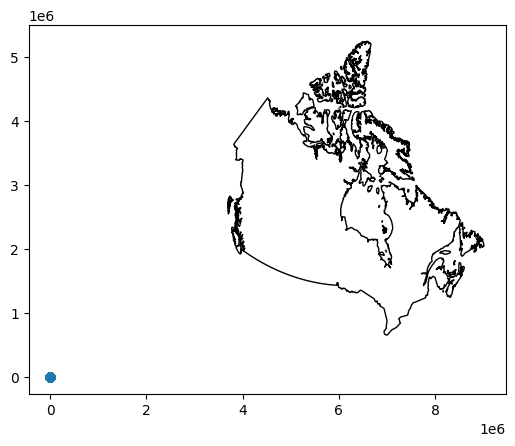

In [89]:
#todo debe estar en un solo sistema de coordenadas
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg),
                 crs=canada.crs.to_epsg())# the coordinates were in degrees - unprojected

# let's plot

base = canada_3347.plot(color='white', edgecolor='black')
airports.plot(ax=base)

<Axes: >

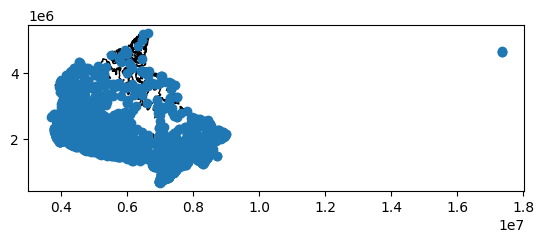

In [92]:
airports_3347=airports.to_crs(3347)

## then

base = canada_3347.plot(color='white', edgecolor='black')
airports_3347.plot(ax=base)

In [93]:
airports_3347['type'].value_counts()

type
small_airport     1177
closed             788
heliport           484
seaplane_base      414
medium_airport     240
large_airport       10
balloonport          1
Name: count, dtype: int64

### Exercise 4 ✴

<div class="alert-success">
    
1. Check if your country is a polygon or multipolygon.
    
2. Recover just the boundaries of that country.
    
3. Turn the boundary into a GDF.
</div>

In [94]:
canada_3347

COUNTRY                                           geometry
35  Canada  MULTIPOLYGON (((6381348.175 4528729.085, 63815...

In [95]:
canada_3347.boundary

35    MULTILINESTRING ((6381348.175 4528729.085, 638...
dtype: geometry

<Axes: >

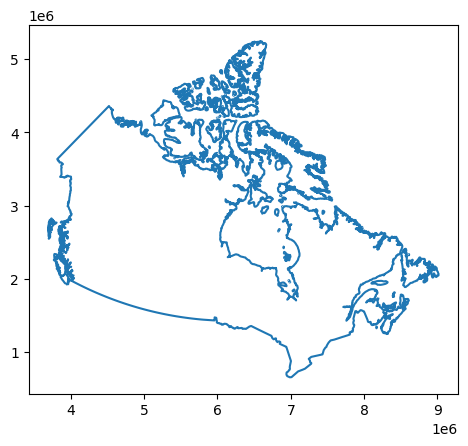

In [96]:
canada_3347.boundary.plot()

In [97]:
#renombrar type porque sino se confunde con la herramienta del colab
airports_3347.rename(columns={'type':'kind'},inplace=True)

## adding the airports to GPKG
airports_3347.to_file(os.path.join("maps","canadaMaps_3347.gpkg"), layer='airports', driver="GPKG")

In [98]:
type(canada_3347.boundary)

geopandas.geoseries.GeoSeries

In [99]:
# converting into GDF
canada_3347.boundary.to_frame()

0
35  MULTILINESTRING ((6381348.175 4528729.085, 638...

### Exercise 5 (conditional)

<div class="alert-success">

1. Look for sub administrative divisions of your country
2. Check all the CRSs of those divisions
3. If you find one CRS is missing, fill the CRS with the right projection.
</div>

In [100]:
#to add some information:
# conversion
canada_border=canada_3347.boundary.to_frame()

# new column (optional)
canada_border['name']='Canada'

# renaming the geometry column
canada_border.rename(columns={0:'geometry'},inplace=True)

#setting the geometry (the name is not enough)
canada_border = canada_border.set_geometry("geometry")

# verifying:
canada_border.crs

<Projected CRS: EPSG:3347>
Name: NAD83 / Statistics Canada Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - onshore and offshore - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon.
- bounds: (-141.01, 38.21, -40.73, 86.46)
Coordinate Operation:
- name: Statistics Canada Lambert
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [102]:
canada_states=gpd.read_file("https://github.com/Journey-of-Success/tarea4_2/raw/main/maps/canada_states/lpr_000b21a_e.shp")
canada_municipalities=gpd.read_file("https://github.com/Journey-of-Success/tarea4_2/raw/main/maps/canada_muni/lcsd000b21a_e.shp")

In [103]:
type(canada_states), type(canada_municipalities)

(geopandas.geodataframe.GeoDataFrame, geopandas.geodataframe.GeoDataFrame)

In [105]:
canada_states.geometry.head()

0    MULTIPOLYGON (((8841194.729 2213093.663, 88411...
1    MULTIPOLYGON (((8374335.443 1629502.597, 83743...
2    MULTIPOLYGON (((8310463.217 1250722.263, 83104...
3    MULTIPOLYGON (((7964100.720 1576822.289, 79641...
4    MULTIPOLYGON (((6948393.211 2760814.626, 69483...
Name: geometry, dtype: geometry

In [106]:
canada_municipalities.geometry.head()

0    MULTIPOLYGON (((8991051.954 2038839.069, 89910...
1    POLYGON ((9001504.369 2049856.597, 9001184.977...
2    POLYGON ((8992311.551 2054468.074, 8994001.626...
3    POLYGON ((8985240.566 2028560.540, 8984967.974...
4    MULTIPOLYGON (((8995265.971 2098624.091, 89952...
Name: geometry, dtype: geometry

In [107]:
canada_states.crs, canada_municipalities.crs
#crs no vacío

(<Projected CRS: EPSG:3347>
 Name: NAD83 / Statistics Canada Lambert
 Axis Info [cartesian]:
 - E[east]: Easting (metre)
 - N[north]: Northing (metre)
 Area of Use:
 - name: Canada - onshore and offshore - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon.
 - bounds: (-141.01, 38.21, -40.73, 86.46)
 Coordinate Operation:
 - name: Statistics Canada Lambert
 - method: Lambert Conic Conformal (2SP)
 Datum: North American Datum 1983
 - Ellipsoid: GRS 1980
 - Prime Meridian: Greenwich,
 <Projected CRS: EPSG:3347>
 Name: NAD83 / Statistics Canada Lambert
 Axis Info [cartesian]:
 - E[east]: Easting (metre)
 - N[north]: Northing (metre)
 Area of Use:
 - name: Canada - onshore and offshore - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan

<Axes: >

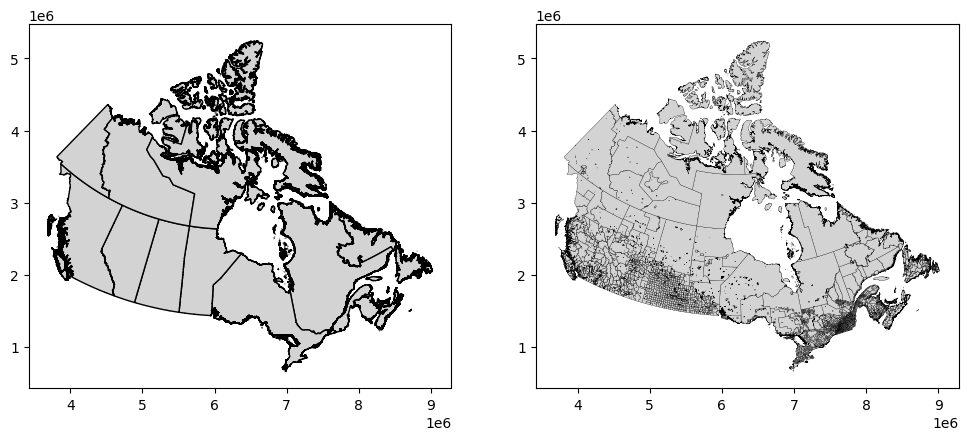

In [108]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

canada_states.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
canada_municipalities.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)

## Exercise 6


<div class="alert-success">

1. Create some subset of polygons with your country data.
2. Use Unary UNION with those  polygons.
3. Create a geoDF with the result.
4. Use dissolve with the same polygons, and create a geoDF.
    
</div>


<Axes: >

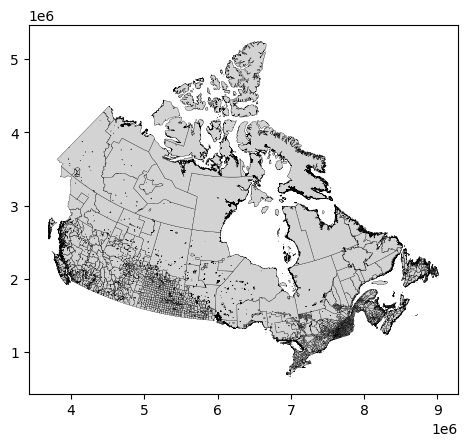

In [109]:
canada_municipalities.plot(facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [110]:
canada_municipalities.head()

CSDUID             DGUID                   CSDNAME CSDTYPE  LANDAREA  \
0  1001101  2021A00051001101  Division No.  1, Subd. V     SNO  870.8928   
1  1001105  2021A00051001105       Portugal Cove South       T    1.0770   
2  1001113  2021A00051001113                 Trepassey       T   54.2130   
3  1001120  2021A00051001120               St. Shott's       T    1.0729   
4  1001124  2021A00051001124  Division No.  1, Subd. U     SNO  742.3781   

  PRUID                                           geometry  
0    10  MULTIPOLYGON (((8991051.954 2038839.069, 89910...  
1    10  POLYGON ((9001504.369 2049856.597, 9001184.977...  
2    10  POLYGON ((8992311.551 2054468.074, 8994001.626...  
3    10  POLYGON ((8985240.566 2028560.540, 8984967.974...  
4    10  MULTIPOLYGON (((8995265.971 2098624.091, 89952...

In [111]:
canada_municipalities.PRUID.value_counts()

PRUID
24    1282
47     951
59     751
35     577
48     423
10     372
13     266
46     239
11      98
12      95
61      41
60      35
62      31
Name: count, dtype: int64

<Axes: >

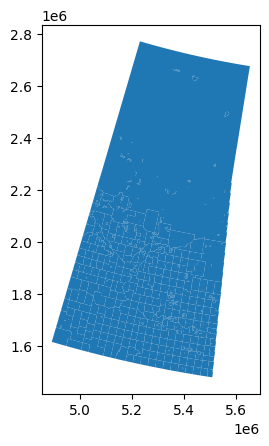

In [112]:
canada_municipalities[canada_municipalities.PRUID=='47'].plot()

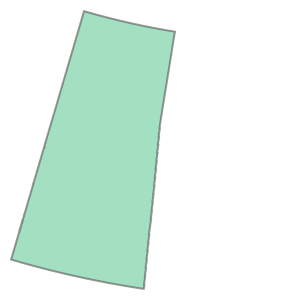

In [113]:
canada_municipalities[canada_municipalities.PRUID=='47'].unary_union

In [114]:
cuatro_siete_union=canada_municipalities[canada_municipalities.PRUID=='47'].unary_union

In [115]:
# what do we have?
type(cuatro_siete_union)

shapely.geometry.polygon.Polygon

In [116]:
gpd.GeoDataFrame(index=[0],data={'ESTADO':'47'},
                 crs=canada_municipalities.crs,
                 geometry=[cuatro_siete_union])

ESTADO                                           geometry
0     47  POLYGON ((5006225.914 1584645.740, 5004650.871...

<Axes: >

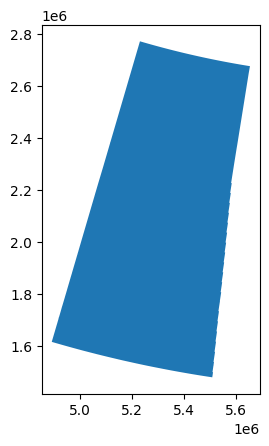

In [117]:
canada_municipalities[canada_municipalities.PRUID=='47'].dissolve().plot()

In [118]:
cuatro_siete_dissolve=canada_municipalities[canada_municipalities.PRUID=='47'].dissolve()

# we got?
type(cuatro_siete_dissolve)

geopandas.geodataframe.GeoDataFrame

In [119]:
cuatro_siete_dissolve

geometry   CSDUID  \
0  POLYGON ((5006225.914 1584645.740, 5004650.871...  4701001   

              DGUID       CSDNAME CSDTYPE  LANDAREA PRUID  
0  2021A00054701001  Argyle No. 1      RM  567.0497    47

<Axes: >

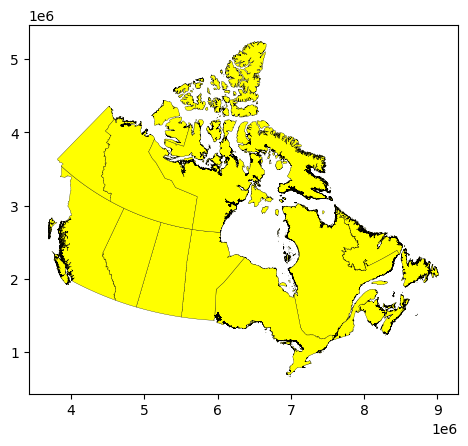

In [120]:
# dissolving
canada_municipalities.dissolve(by='PRUID').plot(facecolor='yellow', edgecolor='black',linewidth=0.2)

In [121]:
Canada_pruid_diss=canada_municipalities.dissolve(by='PRUID')

In [122]:
#GeoDF:
print(Canada_pruid_diss)

                                                geometry   CSDUID  \
PRUID                                                               
10     MULTIPOLYGON (((7705282.980 2861412.211, 77053...  1001101   
11     MULTIPOLYGON (((8264921.754 1617745.026, 82648...  1101002   
12     MULTIPOLYGON (((8268116.149 1250098.737, 82681...  1201001   
13     MULTIPOLYGON (((7915890.123 1538926.769, 79158...  1301001   
24     MULTIPOLYGON (((6926859.200 2796437.206, 69268...  2401023   
35     MULTIPOLYGON (((5968735.374 1474172.520, 59687...  3501005   
46     MULTIPOLYGON (((5634392.580 1463493.126, 56311...  4601035   
47     POLYGON ((5006225.914 1584645.740, 5004650.871...  4701001   
48     POLYGON ((4632347.123 1700668.277, 4625897.891...  4801003   
59     MULTIPOLYGON (((3696269.900 2586160.434, 36962...  5901003   
60     MULTIPOLYGON (((4203341.777 3269800.163, 42027...  6001003   
61     MULTIPOLYGON (((4710843.369 4079853.220, 47108...  6101010   
62     MULTIPOLYGON (((5389389.060

In [123]:
Canada_pruid_diss.drop(columns=['CSDUID','DGUID'],inplace=True)
Canada_pruid_diss.reset_index(inplace=True)
Canada_pruid_diss.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   PRUID     13 non-null     object  
 1   geometry  13 non-null     geometry
 2   CSDNAME   13 non-null     object  
 3   CSDTYPE   13 non-null     object  
 4   LANDAREA  13 non-null     float64 
dtypes: float64(1), geometry(1), object(3)
memory usage: 648.0+ bytes


**EXERCISE 7**

In [ ]:
airports_3347

name            kind  \
0                       Vancouver International Airport   large_airport   
1     Montreal / Pierre Elliott Trudeau Internationa...   large_airport   
2                         Calgary International Airport   large_airport   
3        Ottawa Macdonald-Cartier International Airport   large_airport   
4              Billy Bishop Toronto City Centre Airport  medium_airport   
...                                                 ...             ...   
3108                                  Cow Creek Airport          closed   
3109                                     Yahk Aerodrome          closed   
3110                                    Brazeau Airport          closed   
3111                                    E C Air Airport          closed   
3112                                       Yoyo Airport          closed   

      latitude_deg  longitude_deg  elevation_ft       region_name  \
0        49.193901    -123.183998          14.0  British Columbia   
1        45.467837     -73.742294         118.0            Quebec   
2        51.118822    -114.009933        3557.0           Alberta   
3        45.322498     -75.669197         374.0           Ontario   
4        43.627499     -79.396202         252.0           Ontario   
...            ...            ...           ...               ...   
3108     42.984340     -82.201140         643.0           Ontario   
3109     49.109000    -116.059800        2870.0  British Columbia   
3110     52.967817    -115.867370           NaN           Alberta   
3111     51.536140    -111.193240           NaN           Alberta   
3112     58.925800    -121.473201        1950.0  British Columbia   

     municipality                         geometry  
0       Vancouver  POINT (4010115.329 2000815.126)  
1        Montréal  POINT (7619517.289 1237037.385)  
2         Calgary  POINT (4692351.302 1928852.339)  
3          Ottawa  POINT (7476210.762 1180389.354)  
4         Toronto   POINT (7224333.587 925620.923)  
...           ...                              ...  
3108      Wyoming   POINT (7007069.045 813010.225)  
3109         Yahk  POINT (4476621.273 1772867.687)  
3110   Yellowhead  POINT (4646690.613 2163868.405)  
3111   Youngstown  POINT (4891510.908 1910114.156)  
3112         Yoyo  POINT (4599308.888 2896286.657)  

[3113 rows x 8 columns]

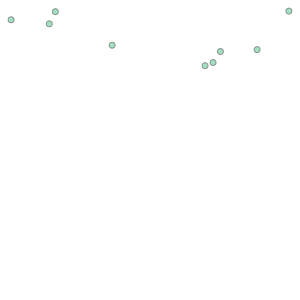

In [ ]:
#Decidimos que puntos se usarán
large_airport=airports_3347[airports_3347.kind=='large_airport']
large_airport.unary_union

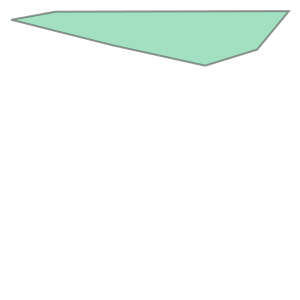

In [ ]:
# hull of the union
large_airport.unary_union.convex_hull

In [ ]:
LargeAirport_hull= gpd.GeoDataFrame(index=[0],
                                    crs=large_airport.crs,
                                    geometry=[large_airport.unary_union.convex_hull])
LargeAirport_hull['name']='large airports hull'

# then

LargeAirport_hull

geometry                 name
0  POLYGON ((7476210.762 1180389.354, 5815823.283...  large airports hull

<Axes: >

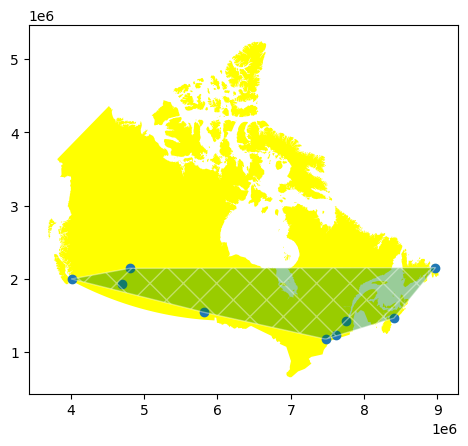

In [ ]:
base=canada_3347.plot(facecolor='yellow')
large_airport.plot(ax=base)
LargeAirport_hull.plot(ax=base,facecolor='green',
                       edgecolor='white',alpha=0.4,
                       hatch='X')

**EXERCISE 8**

In [ ]:
canada_3347.centroid.x.values[0],canada_3347.centroid.y.values[0]

(5972149.890096103, 2686372.7923941617)

In [ ]:
# coordinates
centroidX,centroidY=canada_3347.centroid.x.values[0],canada_3347.centroid.y.values[0]

In [128]:
# the north
MunisN_canada=canada_municipalities.cx[:,centroidY:]
# the south
MunisS_canada=canada_municipalities.cx[:,:centroidY]
# the west
MunisW_canada=canada_municipalities.cx[:centroidX,:]
# the east
MunisE_canada=canada_municipalities.cx[centroidX:,:]

<Axes: >

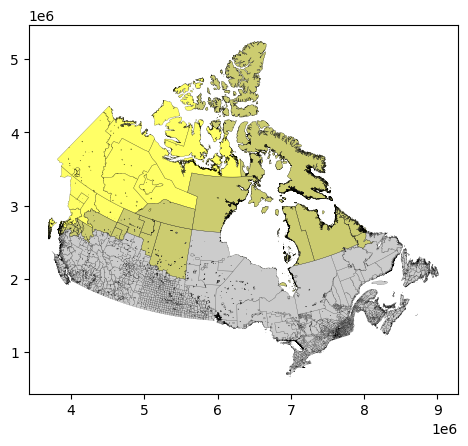

In [ ]:
base=MunisN_canada.plot(facecolor='yellow', edgecolor='black',linewidth=0.2, alpha=0.6)
MunisS_canada.plot(facecolor='grey', edgecolor='black',linewidth=0.2,ax=base, alpha=0.4)

<Axes: >

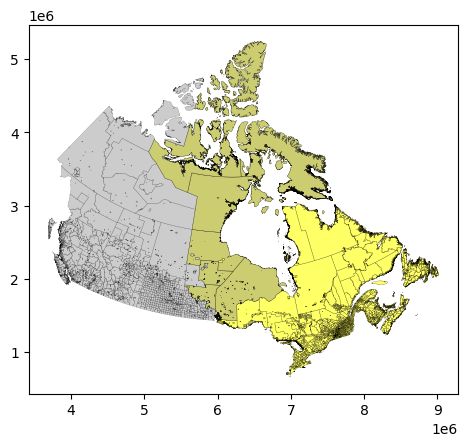

In [ ]:
base=MunisE_canada.plot(facecolor='yellow', edgecolor='black',linewidth=0.2, alpha=0.6)
MunisW_canada.plot(facecolor='grey', edgecolor='black',linewidth=0.2,ax=base, alpha=0.4)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1803: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  merged_geom = block.unary_union


<Axes: >

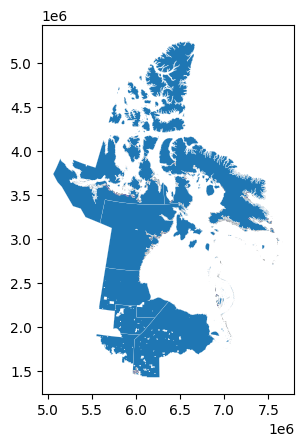

In [70]:
# keeping the overlay
munisWE_canada=MunisW_canada.overlay(MunisE_canada, how="intersection",keep_geom_type=True)
munisWE_canada.plot(edgecolor='white',linewidth=0.1)